In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

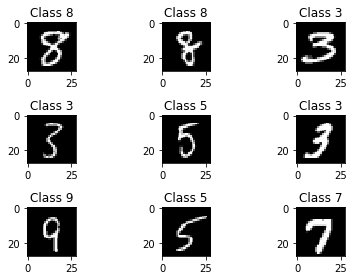

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0   51  113  222  253  253  255  253  174  253  253  255  253  56  0  0  0  0  0  0  0  
0  0  0  0  0   0   10  163  238  252  252  252  252  253  252  252  252  252  2

In [5]:
# Flattening data
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

X_train_flat = X_train_flat.astype('float32')
X_test_flat = X_test_flat.astype('float32')

# Normalization
X_train_flat /= 255
X_test_flat /= 255

print("Training matrix shape", X_train_flat.shape)
print("Testing matrix shape", X_test_flat.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train_flat, Y_train, batch_size=128, epochs=5, verbose=1, validation_split = 0.2)

Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2773 - accuracy: 0.9164 - val_loss: 0.1232 - val_accuracy: 0.9622
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1114 - accuracy: 0.9661 - val_loss: 0.0901 - val_accuracy: 0.9730
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0775 - accuracy: 0.9760 - val_loss: 0.0903 - val_accuracy: 0.9712
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0818 - val_accuracy: 0.9764
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.0761 - val_accuracy: 0.9779


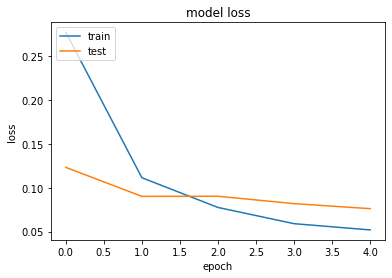

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

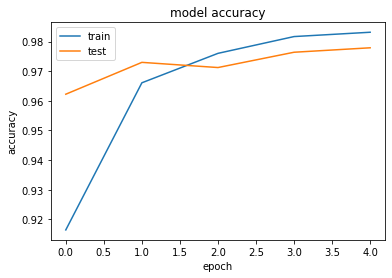

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
score = model.evaluate(X_test_flat, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9785
Test score: 0.06618456542491913
Test accuracy: 0.9785000085830688


# Convolutional

In [13]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
input_shape = (28, 28, 1)
cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(nb_classes, activation="softmax"),
    ]
)
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [15]:
batch_size = 128
epochs = 15

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnnHistory = cnn.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 34ms/step - loss: 0.3639 - accuracy: 0.8886 - val_loss: 0.0896 - val_accuracy: 0.9750
Epoch 2/15
422/422 [==============================] - 15s 35ms/step - loss: 0.1137 - accuracy: 0.9651 - val_loss: 0.0622 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0489 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0386 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0336 - val_accuracy:

In [17]:
score = cnn.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024699022993445396
Test accuracy: 0.9922000169754028


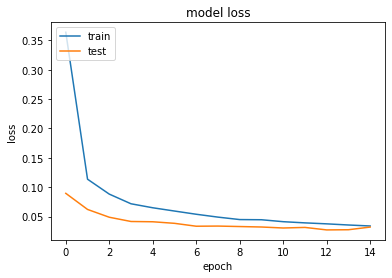

In [18]:
plt.plot(cnnHistory.history['loss'])
plt.plot(cnnHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

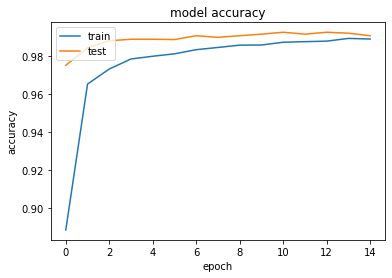

In [19]:
plt.plot(cnnHistory.history['accuracy'])
plt.plot(cnnHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()